In [7]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
train = pd.read_csv('titanic_train.csv')

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
#explore heatmap for data for null values
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

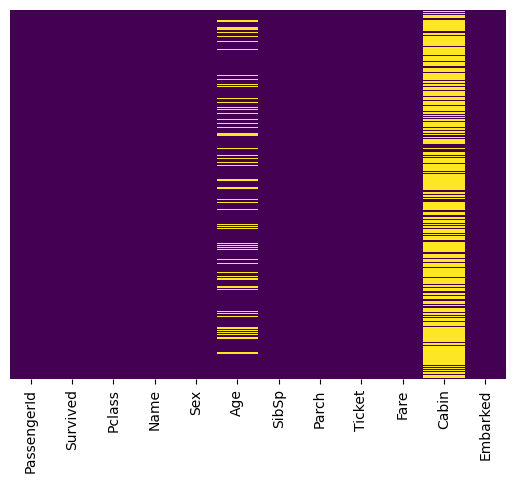

In [19]:
plt.show()

In [21]:
sns.set_style('whitegrid')

In [29]:
sns.countplot(x='Survived',hue='Sex',data=train, palette='RdBu_r') #count of people(male and female) survived and not survived

<Axes: xlabel='Survived', ylabel='count'>

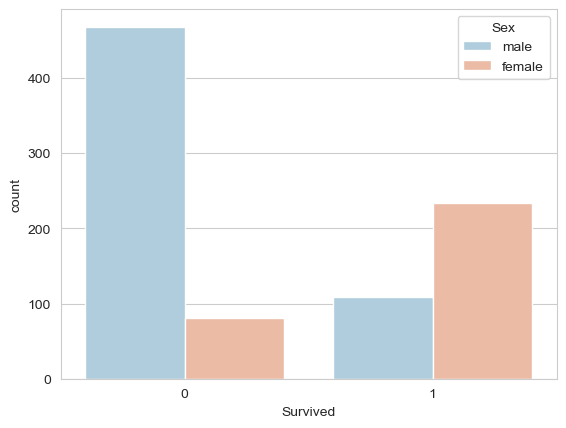

In [31]:
plt.show()

In [33]:
sns.countplot(x='Survived',hue='Pclass',data=train) #count of people survived and not survived based on passenger class

<Axes: xlabel='Survived', ylabel='count'>

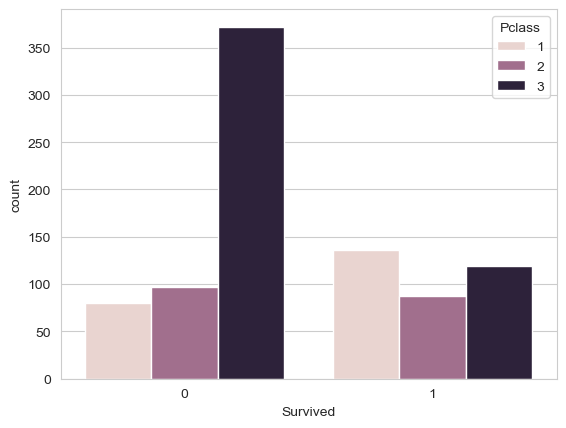

In [35]:
plt.show()

In [41]:
sns.histplot(train['Age'].dropna(),kde=False,bins=30) #passengers on board based on age, another way to do it is
#train['Age'].plot.hist(bins=35)

<Axes: xlabel='Age', ylabel='Count'>

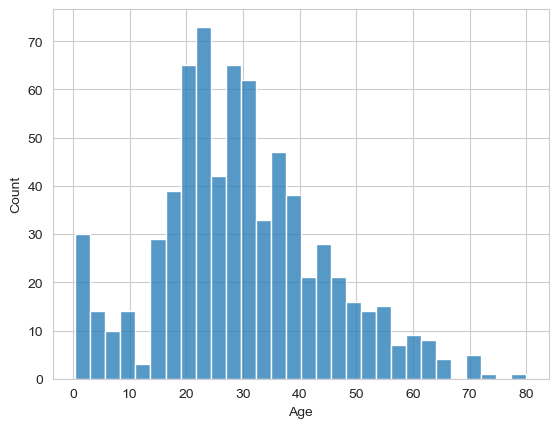

In [43]:
plt.show()

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
#explore siblings and spousee onboard
sns.countplot(x='SibSp',data=train)

<Axes: xlabel='SibSp', ylabel='count'>

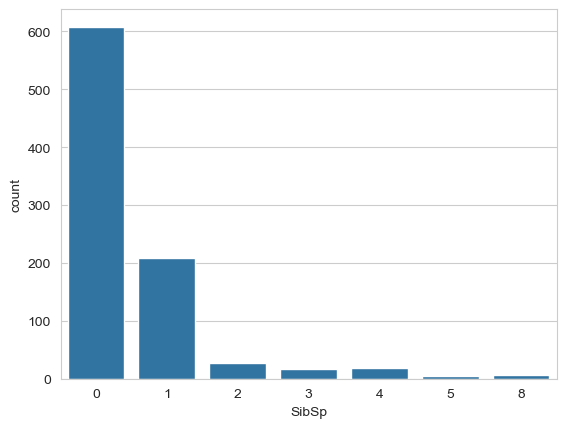

In [49]:
plt.show()

In [59]:
#explore fare column
train['Fare'].hist(bins=40,figsize=(10,4))

<Axes: >

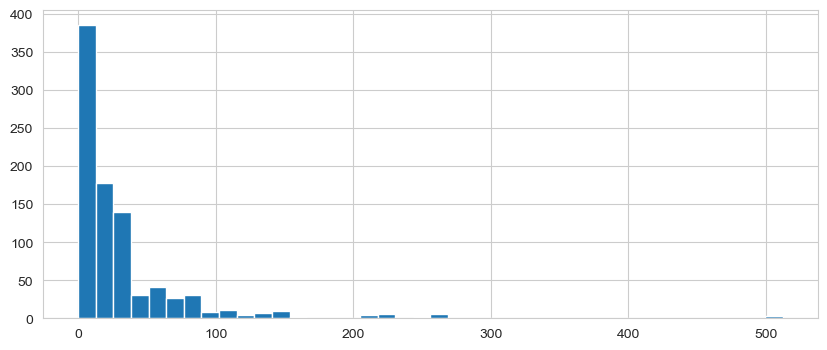

In [61]:
plt.show()

In [63]:
import cufflinks as cf
cf.go_offline()

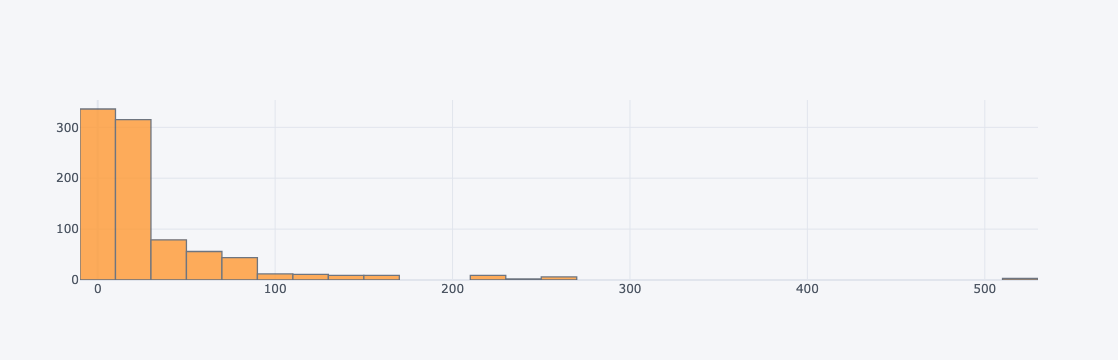

In [69]:
train['Fare'].iplot(kind='hist',bins=50)

In [75]:
#cleaning the data
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

<Axes: xlabel='Pclass', ylabel='Age'>

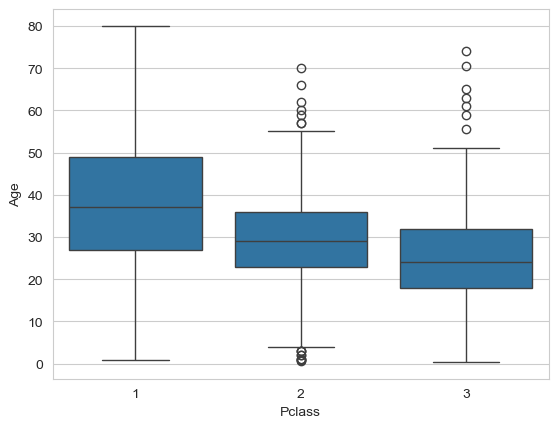

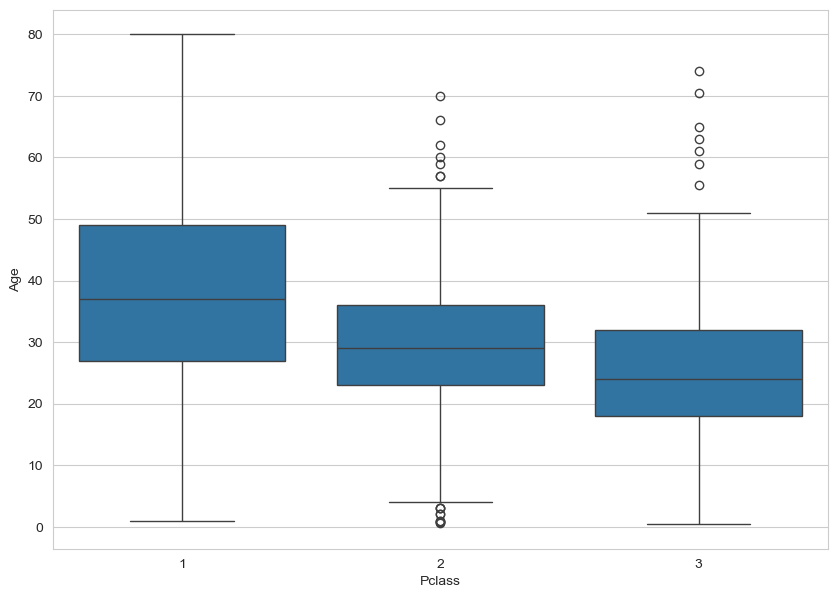

In [77]:
plt.show()

In [79]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [81]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)

/var/folders/1s/4ggyvh4j2vq56xvy1y0_f__w0000gn/T/ipykernel_73141/1334420608.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/1s/4ggyvh4j2vq56xvy1y0_f__w0000gn/T/ipykernel_73141/1334420608.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [85]:
sns.heatmap(train.isnull(), yticklabels = False, cbar=False)

<Axes: >

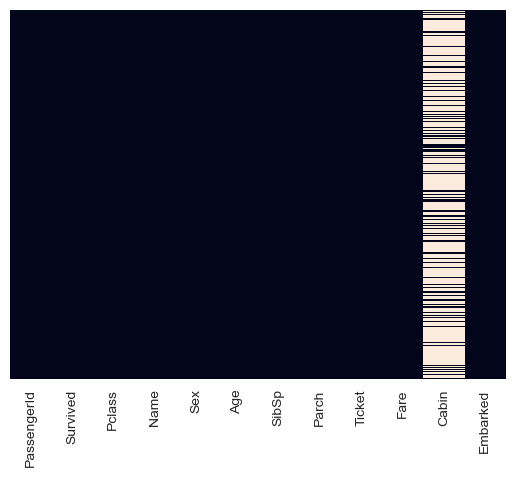

In [87]:
plt.show()

In [89]:
train.drop('Cabin',axis=1,inplace=True)

In [91]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


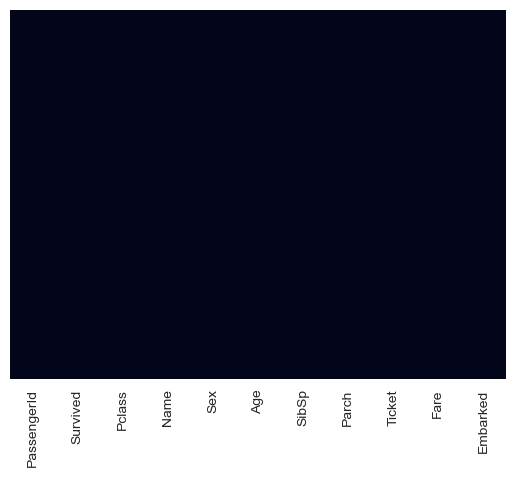

In [93]:
sns.heatmap(train.isnull(), yticklabels = False, cbar=False)
plt.show()

In [95]:
train.dropna(inplace=True)

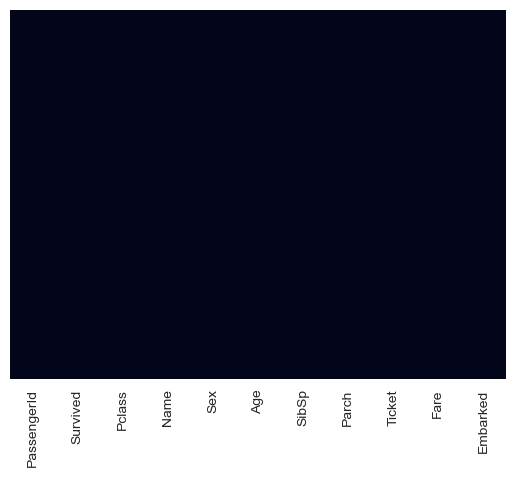

In [97]:
sns.heatmap(train.isnull(), yticklabels = False, cbar=False)
plt.show()

In [107]:
sex = pd.get_dummies(train['Sex'],drop_first=True,dtype=int) #converting sex column to categorical data 0 or 1

In [109]:
embark = pd.get_dummies(train['Embarked'],drop_first=True,dtype=int) #converting embarked column to categorical data 0 or 1

In [111]:
train = pd.concat([train,sex,embark],axis=1)

In [115]:
train.head(2) #2 rows only

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [117]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True) 

In [119]:
train.head() #all data is numerical now

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [121]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [125]:
train.drop('PassengerId',axis=1,inplace=True) #not of value in predicting so removing it

In [127]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [137]:
#train model and predict if passenger survived
# using train as all our data and not using test csv to predict
X = train.drop('Survived',axis=1)
y = train['Survived']

In [139]:
#split the data into training and test sets
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [143]:
from sklearn.linear_model import LogisticRegression

In [151]:
logmodel = LogisticRegression(max_iter=10000)

In [153]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [155]:
predictions = logmodel.predict(X_test)

In [157]:
from sklearn.metrics import classification_report

In [159]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [161]:
from sklearn.metrics import confusion_matrix

In [165]:
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 32,  72]])